## Dataset information:

### classes: edible=e, poisonous=p

### cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

### cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s

### cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

### bruises: bruises=t, no=f

### odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p ,spicy=s

### gill-attachment: attached=a, descending=d, free=f, notched=n

### gill-spacing: close=c, crowded=w, distant=d

### gill-size: broad=b, narrow=n

### gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

### stalk-shape: enlarging=e, tapering=t

### stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

### stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s

### stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s

### stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

### stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

### veil-type: partial=p, universal=u

### veil-color: brown=n, orange=o, white=w, yellow=y

### ring-number: none=n, one=o, two=t

### ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

### spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

### population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

### habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

In [ ]:
import tensorflow as tf
import tensorflow.keras

In [1]:
%matplotlib inline
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
from sklearn.utils import shuffle
from sklearn.utils import class_weight
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import tensorflow as tf
import tensorflow.keras
from tqdm import tqdm
import re
import json

np.set_printoptions(threshold=sys.maxsize)

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)


# # # Voor GPU support
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
# Inlezen van de dataset

dataset = pd.read_csv('./Dataset/mushrooms.csv')

# Print de eerste 5 lijnen van de dataset
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
# Controleren op null values
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
# Momenteel bestaat de data uit verschillende letters per kolom wat moeilijk te begrijpen is
# Met de get_dummies function zorgen we ervoor dat we onze kolommen one-hot encoden
data_dum = pd.get_dummies(dataset)

# Print de shape van de one-hot encoded data
data_dum.shape

(8124, 119)

In [5]:
# Print de eerste 5 lijnen van de one-hot encoded data
# Hierin kunnen we zien dat we nu veel meer kolommen hebben en de letters weg zijn
data_dum.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


<AxesSubplot:xlabel='class', ylabel='count'>

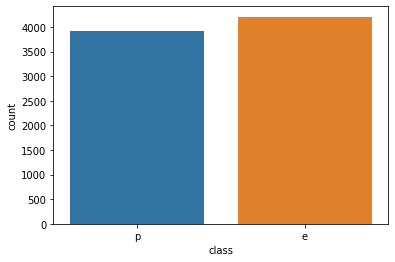

In [6]:
# Controleren of de dataset gebalanceerd is
sns.countplot(x="class", data=dataset)

## Gebalanceerdheid
### We zien dat de data redelijk goed gebalanceerd is en dat we een kleine meerderheid hebben van paddenstoelen die eetbaar zijn vs. de giftige paddenstoelen

In [7]:
# DefiniÃ«er X en Y

# In onze x_data willen we alle data behalve of de paddenstoel eetbaar is of niet dus nemen we alle kolommen na deze 2
# We zetten dit ook om naar een numpy-array met type float
X_data = data_dum.loc[:, 'cap-shape_b':].to_numpy().astype(np.float32)


# In onze y_data mogen we enkel de klasses p en e (poisonous & edible) hebben
# We zetten dit ook om naar een numpy-array met type float
y_data = data_dum.loc[:, :'class_p'].to_numpy().astype(np.float32)


In [8]:
# We definiÃ«ren dat de trainingset 5000 samples moet zijn
n = 5000

# Neem de eerste 5000 samples van de X_data en steek deze in X_train
X_train = X_data[:n]

# Onze testset X_test krijgt de overige ~3000 samples
X_test = X_data[n:]

# Neem de eerste 5000 samples van de y_data en steek deze in y_train
y_train = y_data[:n]

# Onze testset y_test krijgt de overige ~3000 samples
y_test = y_data[n:]

In [9]:
# Print de shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 117)
(3124, 117)
(5000, 2)
(3124, 2)


In [10]:
# DefiniÃ«er de INPUT_SIZE met het aantal kolommen dat X_train heeft
INPUT_SIZE = X_train.shape[1]

# DefiniÃ«er de OUTPUT_SIZE met het aantal kolommen dat y_train heeft
OUTPUT_SIZE = y_train.shape[1]

# DefiniÃ«er EPOCHS_NUM, het aantal epochs dat het model moet doorlopen
EPOCH_NUM = 50

# DefiniÃ«er de BATCH_SIZE dat het model moet gebruiken
BATCH_SIZE = 256

In [11]:
# Maak een placeholder aan met het datatype en de shape voor de inputs
inputs = tf.compat.v1.placeholder(tf.float32, shape=[None, INPUT_SIZE])

# Maak een placeholder aan met het datatype en de shape voor de outputs
outputs = tf.compat.v1.placeholder(tf.float32, shape=[None, OUTPUT_SIZE])

In [13]:
# Maak een nieuwe variabele waarin we een truncated value maken om saturatie te voorkomen waardoor de neuroon niet meer zou bijleren
w = tf.Variable(tf.random.truncated_normal([INPUT_SIZE, OUTPUT_SIZE], stddev=0.1), dtype=tf.float32)

# Maak een nieuwe variabele waarin we een constante tensor aanmaken
b = tf.Variable(tf.constant(0.1, shape=[OUTPUT_SIZE]), dtype=tf.float32)

# Bereken de y_pred
y_pred = tf.matmul(inputs, w) + b

# Maak de de loss function
cross_entropy = tf.reduce_mean(input_tensor=tf.nn.softmax_cross_entropy_with_logits(labels=tf.stop_gradient(outputs), logits=y_pred))

# Laat de Adam Optimizer de train step aanpassen
train_step = tf.compat.v1.train.AdamOptimizer().minimize(cross_entropy)

# DefiniÃ«er hoe de juiste prediction gevonden wordt
correct_prediction = tf.equal(tf.argmax(input=y_pred, axis=1), tf.argmax(input=outputs, axis=1))

# DefiniÃ«er hoe de accuracy berekend wordt
accuracy = tf.reduce_mean(input_tensor=tf.cast(correct_prediction, tf.float32))

# Maak een nieuwe Session
sess = tf.compat.v1.Session()

# Maak een saver om het model op te slaan
saver = tf.compat.v1.train.Saver()

# Run de session met de globale variabelen
sess.run(tf.compat.v1.global_variables_initializer())

# Blijf de for-loop uitvoeren tot het meegegeven aantal epochs is uitgevoerd
for epoch in tqdm(range(EPOCH_NUM), file=sys.stdout):
    # Maak een willekeurige permutatie in onze range van 5000 (n)
    perm = np.random.permutation(n)

    prev_test_acc = 0

    for i in range(0, n, BATCH_SIZE):
        # DefiniÃ«er de X_batch via de eerder gekozen permutatie
        X_batch = X_train[perm[i:i+BATCH_SIZE]]

        # DefiniÃ«er de y_batch via de eerder gekozen permutatie
        y_batch = y_train[perm[i:i+BATCH_SIZE]]

        # Run de train (adam) en feed deze de X_batch en y_batch
        train_step.run(session=sess, feed_dict={inputs: X_batch, outputs: y_batch})

    # Evalueer de accuracy op de training data en feed deze de X_train en de y_train
    acc = accuracy.eval(session=sess, feed_dict={inputs: X_train, outputs: y_train})

    # Evalueer de accuracy op de test data en feed deze de X_test en de y_test
    test_acc = accuracy.eval(session=sess, feed_dict={inputs: X_test, outputs: y_test})

    # Print de accuracy en validation accuracy elke epoch
    if (epoch+1) % 1 == 0:
        tqdm.write('epoch:\t%i\taccuracy:\t%f\tvalidation accuracy:\t%f' % (epoch+1, acc, test_acc))

        # DefiniÃ«er het path naar waar het model gesaved moet worden en save het
        if (test_acc > prev_test_acc):
            save_path = saver.save(sess, './Models/model.ckpt')
            print("Model saved in path: %s" % save_path)
            prev_test_acc = test_acc

epoch:	1	accuracy:	0.677600	validation accuracy:	0.324584
  0%|          | 0/50 [00:00<?, ?it/s]Model saved in path: ./Models/model.ckpt
epoch:	2	accuracy:	0.735400	validation accuracy:	0.379962
  2%|▏         | 1/50 [00:00<00:14,  3.50it/s]Model saved in path: ./Models/model.ckpt
epoch:	3	accuracy:	0.865200	validation accuracy:	0.548656
  4%|▍         | 2/50 [00:00<00:12,  3.91it/s]Model saved in path: ./Models/model.ckpt
epoch:	4	accuracy:	0.896400	validation accuracy:	0.646287
  6%|▌         | 3/50 [00:00<00:11,  3.98it/s]Model saved in path: ./Models/model.ckpt
epoch:	5	accuracy:	0.898000	validation accuracy:	0.688540
  8%|▊         | 4/50 [00:00<00:10,  4.34it/s]Model saved in path: ./Models/model.ckpt
epoch:	6	accuracy:	0.899400	validation accuracy:	0.731754
 10%|█         | 5/50 [00:01<00:10,  4.36it/s]Model saved in path: ./Models/model.ckpt
epoch:	7	accuracy:	0.902200	validation accuracy:	0.766645
 12%|█▏        | 6/50 [00:01<00:09,  4.51it/s]Model saved in path: ./Models/mode

In [14]:
# Splits X_data en y_data op in X_train, X_test en y_train en y_test met een test size van 5000 en random state 123
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=5000, random_state=123)

# Het model opbouwen met keras
model = tf.keras.Sequential([
    # Input shape is het aantal kolommen dat X_train heeft
    tf.keras.layers.Flatten(input_shape=(117,)),

    # Een layer met een dense van 100 en activation 'relu'
    tf.keras.layers.Dense(100, activation=tf.nn.relu),

    # Een layer met een dense van 200 en activation 'relu'
	tf.keras.layers.Dense(200, activation=tf.nn.relu),

    # Een layer met een dense van 200 en activation 'relu'
    tf.keras.layers.Dense(200, activation=tf.nn.relu),

    # Een layer met een dense van 100 en activation 'relu'
	tf.keras.layers.Dense(100, activation=tf.nn.relu),

    # Een layer met een dense van 2 en activation 'sigmoid'
    tf.keras.layers.Dense(2, activation=tf.nn.sigmoid),
])

# Compile het model, hierin kiezen we de optimizer, de loss functie en de metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print een overzicht af van het model dat we net gemaakt hebben
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 117)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               11800     
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dens

In [15]:
# Pas earlystopping toe na 10 epochs
earlystopper = EarlyStopping(patience=10, verbose=1)

# Sla het beste model op
checkpointer = ModelCheckpoint('./Models/model_keras.h5', verbose=1, save_best_only=True)

# Train het model
history = model.fit(X_train, y_train, epochs=20, verbose=1, batch_size=256, validation_data=(X_test, y_test), callbacks=[earlystopper, checkpointer])


Train on 3124 samples, validate on 5000 samples
Epoch 1/20
 256/3124 [=>............................] - ETA: 0s - loss: 0.6983 - acc: 0.4316
Epoch 00001: val_loss improved from inf to 0.18610, saving model to ./Models/model_keras.h5
3124/3124 [==============================] - 0s 114us/sample - loss: 0.4900 - acc: 0.8494 - val_loss: 0.1861 - val_acc: 0.9326
Epoch 2/20
 256/3124 [=>............................] - ETA: 0s - loss: 0.2102 - acc: 0.9043
Epoch 00002: val_loss improved from 0.18610 to 0.03277, saving model to ./Models/model_keras.h5
3124/3124 [==============================] - 0s 33us/sample - loss: 0.0943 - acc: 0.9673 - val_loss: 0.0328 - val_acc: 0.9867
Epoch 3/20
 256/3124 [=>............................] - ETA: 0s - loss: 0.0176 - acc: 0.9922
Epoch 00003: val_loss improved from 0.03277 to 0.00665, saving model to ./Models/model_keras.h5
3124/3124 [==============================] - 0s 36us/sample - loss: 0.0150 - acc: 0.9954 - val_loss: 0.0067 - val_acc: 0.9981
Epoch 4/20

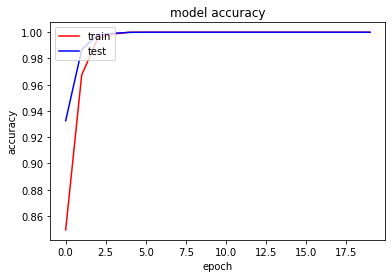

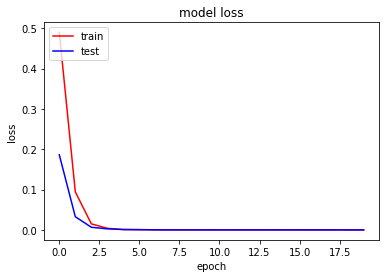

In [16]:
# Plot van de training history

# Accuracy
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Loss
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
# y_test bestaat uit 2 kolommen waarvan slechts 1 kolom telkens '1' is
# Met np.argmax halen we hier de eerste kolom uit waardoor we weten of p = 0 of 1 dus of de paddenstoel poisonous is of niet
rounded_labels = np.argmax(y_test, axis=1)


In [18]:
# We laten ons model klasses predicten op X_test en steken dit in y_pred
y_pred = model.predict_classes(X_test)
print('\n')

# We printen een classificatie report waarbij rounded labels (het juiste label) en y_pred vergeleken worden
print(classification_report(rounded_labels, y_pred))
print('\n')

# We maken een confusion matrix
cf = confusion_matrix(rounded_labels, y_pred)

# We printen de accuracy af en vermenigvuldigen deze met 100 om een percentage te bekomen
print(accuracy_score(rounded_labels, y_pred) * 100)



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2613
           1       1.00      1.00      1.00      2387

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



100.0


In [19]:
# We latens ons model predicten op X_test en steken dit in y_pred
y_pred = model.predict(X_test)

# We berekenen de mean absolute error en printen deze af
print('MAE: %f' % (mean_absolute_error(y_pred, y_test)))

# We berekenen de r2 score en printen deze af
print('R2: %f' % (r2_score(y_pred, y_test)))

MAE: 0.000089
R2: 0.999990


In [23]:
# Dit is een willekeurige array van een giftige paddenstoel die we hebben aanpast met willekeurig 1 en 0 aan te passen/te veranderen
test_array_poison = np.array([[1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0]])

# Dit is een willekeurige array van een eetbare paddenstoel die we hebben aanpast met willekeurig 1 en 0 aan te passen/te veranderen
test_array_edible = np.array([[0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0]])

# print de shape van beide nieuwe arrays
print(test_array_poison.shape)
print(test_array_edible.shape)

(1, 117)
(1, 117)


In [24]:
# laat het model predict of het giftig is of niet
model.predict(test_array_poison)

array([[2.8424052e-05, 9.9995983e-01]], dtype=float32)

In [25]:
# Laat het model predicten of het giftig is of niet
model.predict(test_array_edible)

array([[9.9999928e-01, 2.6621666e-07]], dtype=float32)